In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import expi
from sklearn.metrics import mean_squared_error


In [3]:
class LFR_DZ_CSTR():
    """
    LFR_DZ_CSTR model represents a system where all flow first enters a 
    laminar flow reactor (LFR).The outlet of the LFR goes directly to the 
    CSTR. The model has two primary parameters:
    - a : the fraction of real volume that is described by the LFR
    - b : the fraction of real volume that is described by the CSTR

    Attributes:
    - dt : the amount of time during which the tracer was injected (CFD sim dt)
    - tau : the spacetime of the reactor defined by volume / flow rate
    - bounds : the bounds for the model parameters which are optimized for
    - C0 : initial concnetration injected in pulse experiment

    Notes: 
    - This is currently the best model for Phase I of Miller's dissertation
    - A third parameter that is not a degree of freedom, call it c, is found by
      subtracting the sum of a and b from 1. This is representative of the 
      fraction of the volume represented as a stagnant or deadzone. 
    """

    def __init__(self, dt, tau, bounds=None, initial_guess=None, C0=1):
        """
        Initializes the model 

        Parameters: 
        - See class level doc string
        """
        self.dt = dt
        self.tau = tau
        self.bounds = bounds
        self.C0 = C0
    

    def exp_term(self, t, m):
        """
        This is a necessary term for calculating the outlet of the CSTR
        """

        return np.exp(m*t)*(m*t + 1)/t**2

    def expi_term(self, t, m):
        """
        This is a necessary term for calculating the outlet of the CSTR
        """

        return m**2 * expi(m*t)

    def outlet_concentration(self, t, a, b):
        """
        Calculates the concentration leaving the CSTR for some time, t

        Parameters:
        - a : the fraction of volume given by the LFR
        - b : the fraction of volume given by the CSTR

        Returns:
        - The concentration leaving the CSTR at time t

        """

        tau_LFR = a*self.tau
        tau_CSTR = b*self.tau

        m = 1 / tau_CSTR
        n = tau_LFR**2 * self.C0 * self.dt / 2 / tau_CSTR
        C_0 = 0
        C_IC = n*0.5*(self.exp_term(tau_LFR/2, m) - self.expi_term(tau_LFR/2, m))
        C_1 = (C_IC - 0.5*n*(self.exp_term(t, m) - self.expi_term(t, m)))/np.exp(m*t)
        C_CSTR_out = np.where(t < tau_LFR/2, C_0, C_1)
        return C_CSTR_out
    
    def function(self, xdata, a, b):
        return self.outlet_concentration(xdata, a, b)

In [4]:
model = LFR_DZ_CSTR(0.000192, .6770090/1.5)

t = np.linspace(0, 5, 500)

param_dict = {'Set1': [0.7, 0.25], 'Set2': [0.5, 0.25], 'Set3': [0.3, 0.25],
              'Set4': [0.5, 0.05], 'Set5': [0.5, 0.25], 'Set6': [0.5, 0.45]}

c1 = model.outlet_concentration(t, *param_dict['Set1'])
c2 = model.outlet_concentration(t, *param_dict['Set2'])
c3 = model.outlet_concentration(t, *param_dict['Set3'])

c4 = model.outlet_concentration(t, *param_dict['Set4'])
c5 = model.outlet_concentration(t, *param_dict['Set5'])
c6 = model.outlet_concentration(t, *param_dict['Set6'])

C:\Users\jacob\AppData\Local\Temp\ipykernel_9032\2107740481.py:40: RuntimeWarning: divide by zero encountered in divide
  return np.exp(m*t)*(m*t + 1)/t**2


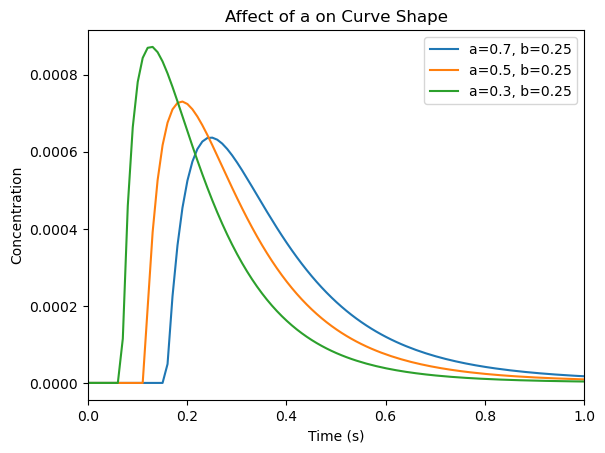

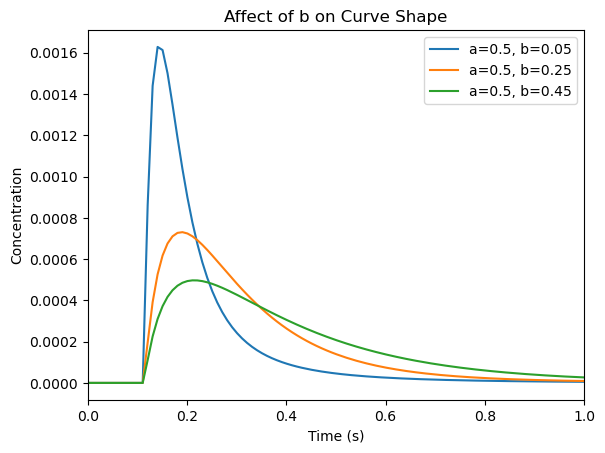

In [5]:
fig, ax = plt.subplots()
ax.plot(t, c1, label=f"a={param_dict['Set1'][0]}, b={param_dict['Set1'][1]}")
ax.plot(t, c2, label=f"a={param_dict['Set2'][0]}, b={param_dict['Set2'][1]}")
ax.plot(t, c3, label=f"a={param_dict['Set3'][0]}, b={param_dict['Set3'][1]}")
plt.title('Affect of a on Curve Shape')
plt.ylabel('Concentration')
plt.xlabel('Time (s)')
plt.xlim(0, 1)
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(t, c4, label=f"a={param_dict['Set4'][0]}, b={param_dict['Set4'][1]}")
ax.plot(t, c5, label=f"a={param_dict['Set5'][0]}, b={param_dict['Set5'][1]}")
ax.plot(t, c6, label=f"a={param_dict['Set6'][0]}, b={param_dict['Set6'][1]}")
plt.title('Affect of b on Curve Shape')
plt.ylabel('Concentration')
plt.xlabel('Time (s)')
plt.xlim(0, 1)
plt.legend()
plt.show()

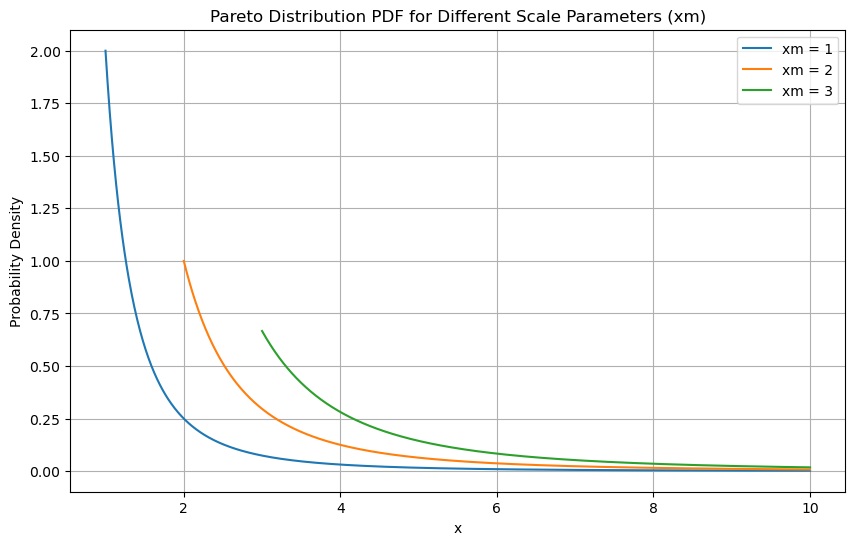

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Pareto distribution function
def pareto_pdf(x, xm, alpha):
    """Compute the PDF of the Pareto distribution."""
    return alpha * xm**alpha / x**(alpha + 1)

# Set up the range and parameters
x = np.linspace(1, 10, 1000)
xm_values = [1, 2, 3]  # Different scale parameters
alpha = 2  # Fixed shape parameter for simplicity

# Plot the Pareto PDF for different scale parameters
plt.figure(figsize=(10, 6))
for xm in xm_values:
    plt.plot(x[x >= xm], pareto_pdf(x[x >= xm], xm, alpha), label=f'xm = {xm}')

plt.title('Pareto Distribution PDF for Different Scale Parameters (xm)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()